# ISLR Ch.3 Exercise

## MSSP MA679

## Sky Liu


## 3.7.1 Describe the null hypotheses to which the p-values given in Table 3.4 correspond. Explain what conclusions you can draw based on these p-values. Your explanation should be phrased in terms of _sales_, _TV_, _radio_, and _newspaper_, rather than in terms of the coefficients of the linear model.

Intercept coefficient: The null hypothese to intercept coeffient is that we would expect an average sales of \\$0 with no budgets in TV ads, radio ads or newspaper ads. With p-value < 0.00001, we would reject this null hypothesis at least 99.99\% confidence level, meaning that the average sales would not be $0 with no budgets in TV ads, radio ads or newspaper ads.

TV coefficient: The null hypothese to TV coeffient is that we would expect an average sales change of \\$0 with a unit increase in TV ads budget, holding budgets in radio ads and newspaper ads constant. With p-value < 0.0001, we would reject this null hypothesis at least 99.99\% confidence level, meaning that the average sales change would not be $0 with a unit increase in TV ads budget, holding budgets in radio ads and newspaper ads constant.

Radio coefficient: The null hypothese to radio coeffient is that we would expect an average sales change of \\$0 with a unit increase in radio ads budget, holding budgets in TV ads and newspaper ads constant. With p-value < 0.0001, we would reject this null hypothesis at least 99.99\% confidence level, meaning that the average sales change would not be $0 with a unit increase in radio ads budget, holding budgets in TV ads and newspaper ads constant.

Newspaper coefficient: The null hypothese to newspaper coeffient is that we would expect an average sales change of \\$0 with a unit increase in newspaper ads budget, holding budgets in TV ads and radio ads constant. With p-value = 0.8599, we would fail to reject this null hypothesis 85.99\% confidence level, meaning that the average sales change would be $0 with a unit increase in newspaper ads budget, holding budgets in TV ads and radio ads constant.



## 3.7.2 Carefully explain the differences between the KNN classifier and KNN regression methods.

KNN classifier __classifies__ the test observation to the most common class of K nearest neighbers.
KNN regression makes an estimated __quantitative__ value by averaging the value of K nearest neighbers.



## 3.7.5 Consider the fitted values that result from performing linear regression without an intercept. In this setting, the _i_th fitted value takes the form $\hat{y}_{i} = x_{i} \hat{\beta}$, where $\hat{\beta} = \frac{\sum_{i=1}^{n}\left ( x_{i} y_{i} \right )}{\sum_{i'=1}^{n}\left ( x_{i'}^2 \right )}$. Show that we can write $\hat{y_i} = \sum_{i'=1}^{n}\left(a_{i'}y_{i'}\right)$. What is $a_{i'}$?

$\hat{y}_{i} = x_{i} \frac{\sum_{i=1}^{n}\left ( x_{i} y_{i} \right )}{\sum_{i'=1}^{n}\left ( x_{i'}^2 \right )}$
$= \frac{\sum_{i=1}^{n}\left ( x_{i} y_{i}\frac{x_i}{n}\right )}{\sum_{i'=1}^{n}\left ( x_{i'}^2 \right )}$
$= \frac{\sum_{i=1}^{n}\left ( \frac{{x_i}^2}{n} y_{i}\right )}{\sum_{i'=1}^{n}\left ( x_{i'}^2 \right )}$
$= \sum_{i'=1}^{n}\left (\frac{ \frac{{x_i’}^2}{n} y_{i‘}}{ x_{i'}^2 } \right)$
$= \sum_{i'=1}^{n}\left (\frac{1}{n} y_{i‘} \right) = \sum_{i'=1}^{n}\left(a_{i'}y_{i'}\right)$

Therefore,
$a_{i'}=\frac{1}{n}$

## 3.7.6 Using (3.4), argue that in the case of simple linear regression, the least squares line always passes through the point ($\bar{x}, \bar{y}$).

In order to check if ($\bar{x}, \bar{y}$) is a point on $y = \beta_0 + \beta_1 x$, we put $x = \bar{x}, y = \bar{y}$ this line and see if the left and the right are equal.

We obtain $\bar{y} = \beta_0 + \beta_1 \bar{x}$

Using equation (3.4), $\hat{\beta_0} = \bar{y} - \hat{\beta_1}\bar{x}$, we obtain

$\bar{y} = \bar{y} - \hat{\beta_1}\bar{x} + \hat{\beta_1} \bar{x} = \bar{y}$

## 3.7.11

### part a

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import scale
import sklearn.linear_model as skl_lm
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from numpy import corrcoef
from pandas.plotting import scatter_matrix
from statsmodels.stats.outliers_influence import OLSInfluence
from statsmodels.graphics.regressionplots import plot_leverage_resid2

np.random.seed(2019)
x=np.random.normal(0,1,100)
y=2*x+np.random.normal(0,1,100)



m1=sm.OLS(y,x).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     333.2
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.89e-33
Time:                        23:39:13   Log-Likelihood:                -149.22
No. Observations:                 100   AIC:                             300.4
Df Residuals:                      99   BIC:                             303.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.9563      0.107     18.253      0.000       1.744       2.169
==============================================================================
Omnibus:                        0.149   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.928   Jarque-Bera (JB):                0.044
Skew:                          -0.051   Prob(JB):                        0.978
Kurtosis:                       2.997   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coeffient is 1.9563, which means if x increases by one unit, y will be increased by 1.9563 on average. The standard error of this coeffient estimate is 0.107, t-value is 18.253， p-value is very close to 0, and the 95% confidence interval is [1.744,2.169], which means the coeffient of x will fall in to this interval with 95% change. Since 0 is not in the interval and p-value is very small, we would conclude that x is statistically significant to y.


### part b

In [2]:
m2=sm.OLS(x,y).fit()
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     333.2
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.89e-33
Time:                        23:39:13   Log-Likelihood:                -69.105
No. Observations:                 100   AIC:                             140.2
Df Residuals:                      99   BIC:                             142.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.3941      0.022     18.253      0.000       0.351       0.437
==============================================================================
Omnibus:                        1.765   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.414   Jarque-Bera (JB):                1.474
Skew:                           0.297   Prob(JB):                        0.479
Kurtosis:                       3.035   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The coeffient is 0.3941, which means if x increases by one unit, y will be increased by 0.3941 on average. The standard error of this coeffient estimate is 0.022, t-value is 18.253， p-value is very close to 0, and the 95% confidence interval is [0.351，0.437], which means the coeffient of x will fall in to this interval with 95% change. Since 0 is not in the interval and p-value is very small, we would conclude that y is statistically significant to x.



### part c

Theoratically, $\hat{\beta_{x}}=\frac{1}{\hat{\beta_{y}}}$ , $\frac{1}{1.9563} = 0.51 \approx 0.3941$

### part d

$
t = \frac{\beta}{SE(\beta)}={\frac {\sum{x_i y_i}} {\sum{x_i^2}}}
    {\sqrt{\frac {(n-1) \sum{x_i^2}} {\sum{(y_i - x_i \beta)^2}}}}$
    
 $ 
= \frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{(y_i - x_i \beta)^2}}}$
      
$
=\frac {\sqrt{n-1} \sum{x_i y_i}}
      {\sqrt{\sum{x_i^2} \sum{(y_i^2 - 2 \beta x_i y_i  + x_i^2 \beta^2)}}}$
      
$
=\frac {\sqrt{n-1} \sum{x_i y_i}}{\sqrt{\sum{x_i^2} \sum{y_i^2} - \sum{x_i^2} \beta (2 \sum{x_i y_i} - \beta \sum{x_i^2})}}$

$       
=\frac {\sqrt{n-1} \sum{x_i y_i}} {\sqrt{\sum{x_i^2} \sum{y_i^2} - \sum{x_i y_i} (2 \sum{x_i y_i} - \sum{x_i y_i})}}$

$           
=\frac {\sqrt{n-1} \sum{x_i y_i}} {\sqrt{\sum{x_i^2} \sum{y_i^2} - (\sum{x_i y_i})^2 }}$

In [3]:

a=np.dot(x, x) 
b=np.dot(x, y) 
c=np.dot(y, y) 

math.sqrt(len(x) - 1) * sum(x*y) / math.sqrt(sum(x**2)*sum(y**2) - sum(x*y)**2)

18.253237805600786

### part e

plugging (x,y) and (y,x) into part d equation, we would obtain the same result


### part f

In [4]:

m3 = sm.OLS(y,sm.add_constant(x)).fit()

m3.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     330.6
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           3.64e-33
Time:                        23:39:13   Log-Likelihood:                -148.78
No. Observations:                 100   AIC:                             301.6
Df Residuals:                      98   BIC:                             306.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1015      0.109      0.928      0.356      -0.116       0.319
x1             1.9709      0.108     18.182      0.000       1.756       2.186
==============================================================================
Omnibus:                        0.160   Durbin-Watson:                   2.075
Prob(Omnibus):                  0.923   Jarque-Bera (JB):                0.061
Skew:                          -0.060   Prob(JB):                        0.970
Kurtosis:                       2.992   Cond. No.                         1.16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
m4 = sm.OLS(x,sm.add_constant(y)).fit()
m4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.771
Model:                            OLS   Adj. R-squared:                  0.769
Method:                 Least Squares   F-statistic:                     330.6
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           3.64e-33
Time:                        23:39:13   Log-Likelihood:                -67.950
No. Observations:                 100   AIC:                             139.9
Df Residuals:                      98   BIC:                             145.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0732      0.048     -1.514      0.133      -0.169       0.023
x1             0.3914      0.022     18.182      0.000       0.349       0.434
==============================================================================
Omnibus:                        1.807   Durbin-Watson:                   2.178
Prob(Omnibus):                  0.405   Jarque-Bera (JB):                1.497
Skew:                           0.299   Prob(JB):                        0.473
Kurtosis:                       3.047   Cond. No.                         2.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The t statistics are both 18.182

## 3.7.12

### part a

$\sum x_{i}^2=\sum y_{i}^2$

### part b

In [6]:
print("The coefficient estimate for the regression of x onto y is",m1.params)
print("the coefficient estimate for the regression of y onto x is",m2.params)

The coefficient estimate for the regression of x onto y is [1.95629319]
the coefficient estimate for the regression of y onto x is [0.39407649]


In [7]:
np.random.seed(20191)

p = np.random.normal(0,1,1000)
q = np.random.normal(0,1,1000)


m5 = sm.OLS(p,q).fit()
m6 = sm.OLS(q,p).fit()

print("The coefficient estimate for the regression of q onto p is",m5.params)
print("The coefficient estimate for the regression of p onto q is",m6.params)

The coefficient estimate for the regression of q onto p is [-0.0269477]
The coefficient estimate for the regression of p onto q is [-0.02658923]


## 3.7.13

### part a

In [8]:
np.random.seed(20192)

x13 = np.random.normal(0,1,100)

### part b

In [9]:
eps = np.random.normal(0,0.25,100)

### part c

In [10]:
y13 = -1 + 0.5*x13 + eps

print("The length of y13 is",len(y13))



The length of y13 is 100


$\beta_{0}=-1 $ 
$\beta_{1}=0.5$

### part d

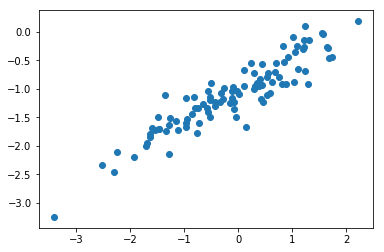

In [11]:


plt.scatter(x13,y13)

From the plot above we could see that x13 and y13 are positively correlated.

### part e

In [12]:

x131= sm.add_constant(x13)

m7 = sm.OLS(y13,x131).fit()


m7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     548.4
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           6.26e-42
Time:                        23:39:13   Log-Likelihood:                 2.3777
No. Observations:                 100   AIC:                           -0.7553
Df Residuals:                      98   BIC:                             4.455
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0492      0.024    -43.738      0.000      -1.097      -1.002
x1             0.5084      0.022     23.418      0.000       0.465       0.551
==============================================================================
Omnibus:                        1.209   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.546   Jarque-Bera (JB):                0.772
Skew:                          -0.190   Prob(JB):                        0.680
Kurtosis:                       3.201   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The estimated coefficients are very close to the $\beta_{0}=-1$ and $\beta_{1}=0.5$

### part f

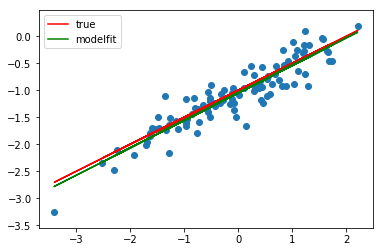

In [13]:
fig, ax = plt.subplots()
ax.scatter(x13,y13)
ax.plot(x13,-1 + 0.5*x13,'r',label='true')
ax.plot(x13, -1.0492 + 0.5084*x13, 'g',label='modelfit' )
ax.axis('equal')
leg = ax.legend();

### part g

In [14]:


data13 = {"y13": y13, "x13": x13}

m8 = smf.ols(formula = 'y13 ~ np.power(x13,2) + x13', data = data13).fit()
m8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    y13   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     275.5
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           9.92e-41
Time:                        23:39:13   Log-Likelihood:                 3.0167
No. Observations:                 100   AIC:                          -0.03348
Df Residuals:                      97   BIC:                             7.782
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0290      0.030    -34.252      0.000      -1.089      -0.969
np.power(x13, 2)    -0.0174      0.016     -1.117      0.267      -0.048       0.014
x13                  0.4988      0.023     21.397      0.000       0.453       0.545
==============================================================================
Omnibus:                        1.127   Durbin-Watson:                   1.814
Prob(Omnibus):                  0.569   Jarque-Bera (JB):                0.664
Skew:                          -0.157   Prob(JB):                        0.717
Kurtosis:                       3.247   Cond. No.                         2.97
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

$R^2$ improved from 0.848 to 0.85 and the quadratic term has non significant coefficient

No significant improvement. Because the data is pretty linear.

### part h

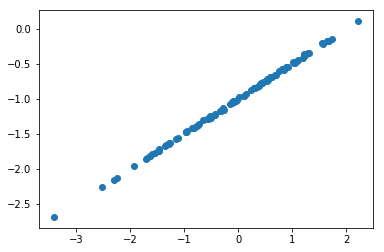

In [15]:
np.random.seed(20193)

xh=x13
epsh = np.random.normal(0,0.01,100)
yh = -1 + 0.5*xh + epsh

plt.scatter(xh,yh)

In [16]:
m9 = sm.OLS(yh,sm.add_constant(xh)).fit()


m9.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.655e+05
Date:                Thu, 31 Jan 2019   Prob (F-statistic):          4.87e-170
Time:                        23:39:13   Log-Likelihood:                 313.26
No. Observations:                 100   AIC:                            -622.5
Df Residuals:                      98   BIC:                            -617.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9999      0.001   -933.430      0.000      -1.002      -0.998
x1             0.4995      0.001    515.280      0.000       0.498       0.501
==============================================================================
Omnibus:                        0.380   Durbin-Watson:                   2.168
Prob(Omnibus):                  0.827   Jarque-Bera (JB):                0.483
Skew:                           0.137   Prob(JB):                        0.785
Kurtosis:                       2.798   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

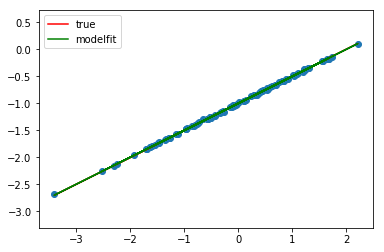

In [17]:
figh, axh = plt.subplots()
axh.scatter(xh,yh)
axh.plot(xh,-1 + 0.5*xh,'r',label='true')
axh.plot(xh, -0.9999 + 0.4995*xh, 'g',label='modelfit' )
axh.axis('equal')
leg = axh.legend();

The two lines are almost overlapping completely

### part i

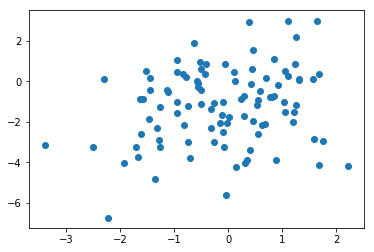

In [18]:
np.random.seed(20194)

xi=x13
epsi = np.random.normal(0,2,100)
yi = -1 + 0.5*xi + epsi

plt.scatter(xi,yi)

In [19]:
m10 = sm.OLS(yi,sm.add_constant(xi)).fit()


m10.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.048
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     4.905
Date:                Thu, 31 Jan 2019   Prob (F-statistic):             0.0291
Time:                        23:39:13   Log-Likelihood:                -201.77
No. Observations:                 100   AIC:                             407.5
Df Residuals:                      98   BIC:                             412.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.1647      0.185     -6.304      0.000      -1.531      -0.798
x1             0.3703      0.167      2.215      0.029       0.039       0.702
==============================================================================
Omnibus:                        1.419   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.492   Jarque-Bera (JB):                1.461
Skew:                          -0.272   Prob(JB):                        0.482
Kurtosis:                       2.765   Cond. No.                         1.15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

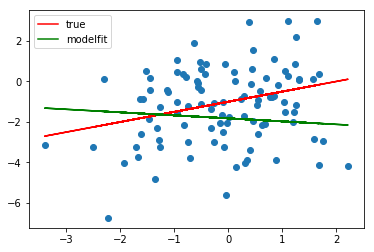

In [20]:
figi, axi = plt.subplots()
axi.scatter(xi,yi)
axi.plot(xi,-1 + 0.5*xi,'r',label='true')
axi.plot(xi, -1.8233 -0.1485*xi, 'g',label='modelfit' )
axh.axis('equal')
leg = axi.legend();

The two lines have slopes in bigger difference

### part j

The confidence interval of $\beta_0$ for the original data set is [-1.097, -1.002]

The confidence interval of $\beta_0$ for the less noisy data set is [-1.002, -0.998]

The confidence interval of $\beta_0$ for the more noisy data set is [-1.531, -0.798]

The confidence interval of $\beta_1$ for the original data set is [0.465,0.551]

The confidence interval of $\beta_1$ for the less noisy data set is [0.498, 0.501]

The confidence interval of $\beta_1$ for the more noisy data set is [0.039, 0.702]

The confidence interval for the less noisy data set is narrow and having the true $\beta$ in the middle. The confidence interval for the original data set is wider and not very far off the true $\beta$, while the confidence interval for the more noisy data set is very wide and far from the true $\beta$


## 3.7.14

### part a


In [21]:
np.random.seed(20195)

c1 = np.random.random(100)

c2 = 0.5*c1 + np.random.randn(100)/10

d =2+2* c1 +0.3* c2 + np.random.randn(100)

data14 = {"d":d , "c1": c1, "c2": c2}

### part b

In [22]:

print(corrcoef(c1,c2))

df14 = pd.DataFrame(np.column_stack((d,c1,c2)), columns=['d','c1','c2'] )
df14.head()




[[1.         0.76171502]
 [0.76171502 1.        ]]


,d,c1,c2
0,0.913956,0.331116,0.297105
1,3.043108,0.815345,0.321567
2,3.385680,0.309791,0.058966
3,5.132308,0.997439,0.352063
4,4.169054,0.651828,0.519775


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1b008a58>,
      dtype=object)

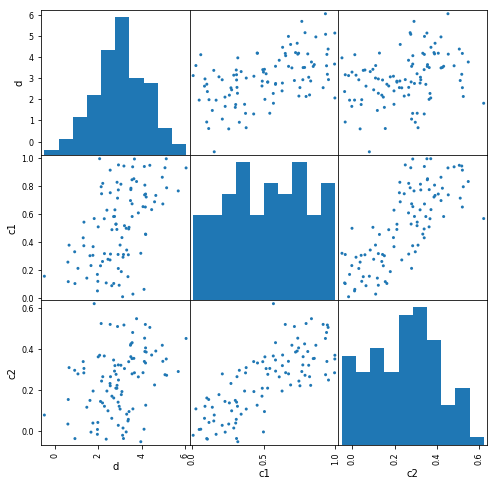

In [23]:
scatter_matrix(df14, figsize = (8,8),alpha=1)


In [24]:
### part c

In [25]:

m11 = smf.ols(formula = 'd ~ c1 + c2', data = data14).fit()
m11.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     19.13
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           9.90e-08
Time:                        23:39:14   Log-Likelihood:                -141.77
No. Observations:                 100   AIC:                             289.5
Df Residuals:                      97   BIC:                             297.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8754      0.215      8.720      0.000       1.449       2.302
c1             2.7981      0.560      4.994      0.000       1.686       3.910
c2            -1.4160      0.984     -1.439      0.153      -3.368       0.536
==============================================================================
Omnibus:                        0.689   Durbin-Watson:                   2.364
Prob(Omnibus):                  0.709   Jarque-Bera (JB):                0.799
Skew:                          -0.103   Prob(JB):                        0.671
Kurtosis:                       2.613   Cond. No.                         12.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept coefficient $\beta_0 = 1.8754$ and  $\beta_1$ = 2.7981 are statistically significant with very small p-value and 95% confidence intervals containing no zero. We can reject the null hypothesis of $\beta_1 = 0$. while $\beta_2$ = -1.416 is not very statistically significant at a 95% confidence level, which has a p-value = 0.15 and a 95% confidence interval containg zero. We cannot reject the null hypothesis of $\beta_2 = 0$.

### part d

In [26]:
m12 = smf.ols(formula = 'd ~ c1', data = data14).fit()

m12.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.260
Method:                 Least Squares   F-statistic:                     35.80
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           3.58e-08
Time:                        23:39:14   Log-Likelihood:                -142.82
No. Observations:                 100   AIC:                             289.6
Df Residuals:                      98   BIC:                             294.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.8470      0.215      8.578      0.000       1.420       2.274
c1             2.1838      0.365      5.983      0.000       1.460       2.908
==============================================================================
Omnibus:                        0.889   Durbin-Watson:                   2.313
Prob(Omnibus):                  0.641   Jarque-Bera (JB):                0.946
Skew:                          -0.113   Prob(JB):                        0.623
Kurtosis:                       2.581   Cond. No.                         4.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept coefficient $\beta_0 = 1.8470$ and  $\beta_1$ = 2.1838 are statistically significant with very small p-value and 95% confidence intervals containing no zero. We can reject the null hypothesis of $\beta_1 = 0$. 

### part e

In [27]:
m13 = smf.ols(formula = 'd ~ c2', data = data14).fit()

m13.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.098
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     10.71
Date:                Thu, 31 Jan 2019   Prob (F-statistic):            0.00147
Time:                        23:39:14   Log-Likelihood:                -153.21
No. Observations:                 100   AIC:                             310.4
Df Residuals:                      98   BIC:                             315.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.4108      0.208     11.592      0.000       1.998       2.823
c2             2.3263      0.711      3.272      0.001       0.915       3.737
==============================================================================
Omnibus:                        0.694   Durbin-Watson:                   2.239
Prob(Omnibus):                  0.707   Jarque-Bera (JB):                0.531
Skew:                          -0.178   Prob(JB):                        0.767
Kurtosis:                       2.998   Cond. No.                         6.67
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The intercept coefficient $\beta_0 = 2.4108$ and  $\beta_1$ = 2.3263 are statistically significant with very small p-value and 95% confidence intervals containing no zero. We can reject the null hypothesis of $\beta_1 = 0$. 

### part f

In part c,  we find that the coeffecient of c1 is significant and  the coeffecient of c2 is not significant.

In part d,  we find that the coeffecient of c1 is significant by itself and in part e, the coeffecient of c2 is significant by itself.

This is not contradicted because c1 and c2 are both influential to d independently, and there exists correlation between c1 and c2. 

### part g

In [28]:
df14miss = pd.DataFrame([[6,0.1,0.8]], columns=['d','c1','c2'])

df14g = df14.append(df14miss)

m14 = smf.ols(formula = 'd ~ c1 + c2', data = df14g).fit()
m14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.218
Model:                            OLS   Adj. R-squared:                  0.202
Method:                 Least Squares   F-statistic:                     13.67
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           5.79e-06
Time:                        23:39:14   Log-Likelihood:                -150.22
No. Observations:                 101   AIC:                             306.4
Df Residuals:                      98   BIC:                             314.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9530      0.230      8.507      0.000       1.497       2.409
c1             1.6546      0.514      3.218      0.002       0.634       2.675
c2             0.8200      0.863      0.951      0.344      -0.892       2.532
==============================================================================
Omnibus:                        0.253   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.881   Jarque-Bera (JB):                0.091
Skew:                           0.071   Prob(JB):                        0.956
Kurtosis:                       3.035   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
m15 = smf.ols(formula = 'd ~ c1', data = df14g).fit()

m15.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.203
Method:                 Least Squares   F-statistic:                     26.47
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           1.36e-06
Time:                        23:39:14   Log-Likelihood:                -150.68
No. Observations:                 101   AIC:                             305.4
Df Residuals:                      99   BIC:                             310.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.9916      0.226      8.819      0.000       1.543       2.440
c1             1.9789      0.385      5.145      0.000       1.216       2.742
==============================================================================
Omnibus:                        3.183   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.204   Jarque-Bera (JB):                2.674
Skew:                           0.248   Prob(JB):                        0.263
Kurtosis:                       3.624   Cond. No.                         4.57
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
m16 = smf.ols(formula = 'd ~ c2', data = df14g).fit()

m16.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      d   R-squared:                       0.136
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                     15.53
Date:                Thu, 31 Jan 2019   Prob (F-statistic):           0.000152
Time:                        23:39:14   Log-Likelihood:                -155.29
No. Observations:                 101   AIC:                             314.6
Df Residuals:                      99   BIC:                             319.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.3439      0.204     11.503      0.000       1.940       2.748
c2             2.6609      0.675      3.940      0.000       1.321       4.001
==============================================================================
Omnibus:                        0.787   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.675   Jarque-Bera (JB):                0.712
Skew:                          -0.202   Prob(JB):                        0.701
Kurtosis:                       2.924   Cond. No.                         6.35
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

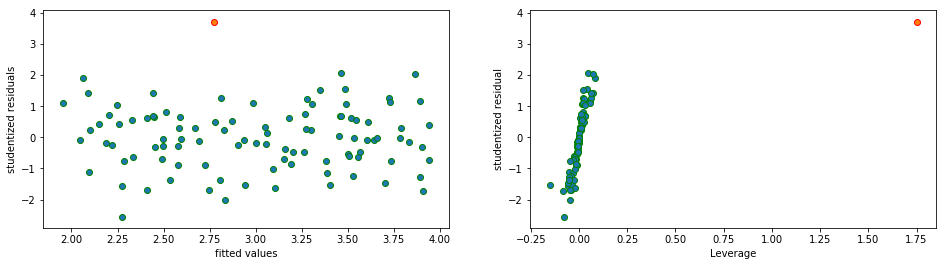

In [31]:
#model 1
fitted_values14 = m14.fittedvalues.values
residuals14 = m14.resid.values
studentized_residuals14 = OLSInfluence(m14).resid_studentized_internal
leverages14 = OLSInfluence(m14).influence

fig, (ax11,ax21) = plt.subplots(1,2,figsize=(16,4))

ax11.scatter(fitted_values14[:-1], studentized_residuals14[:-1],  edgecolors='g');
ax11.scatter(fitted_values14[-1], studentized_residuals14[-1],  edgecolors='r');
ax11.set_xlabel('fitted values');
ax11.set_ylabel('studentized residuals');

ax21.scatter(leverages14[:-1], studentized_residuals14[:-1],  edgecolors='g');
ax21.scatter(leverages14[-1], studentized_residuals14[-1],  edgecolors='r');
ax21.set_xlabel('Leverage');
ax21.set_ylabel('studentized residual');

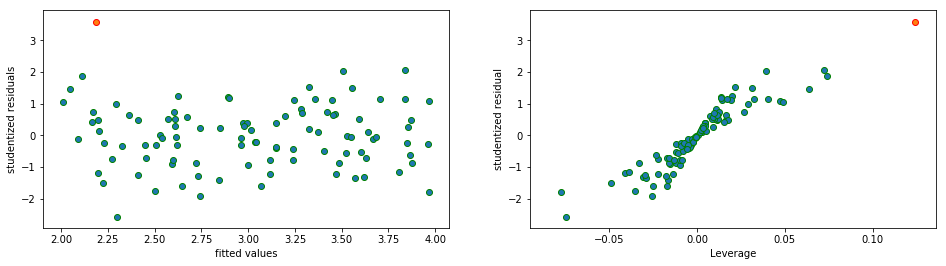

In [32]:
#model 2
fitted_values15 = m15.fittedvalues.values
residuals15 = m15.resid.values
studentized_residuals15 = OLSInfluence(m15).resid_studentized_internal
leverages15 = OLSInfluence(m15).influence

fig, (ax12,ax22) = plt.subplots(1,2,figsize=(16,4))

ax12.scatter(fitted_values15[:-1], studentized_residuals15[:-1],  edgecolors='g');
ax12.scatter(fitted_values15[-1], studentized_residuals15[-1],  edgecolors='r');
ax12.set_xlabel('fitted values');
ax12.set_ylabel('studentized residuals');

ax22.scatter(leverages15[:-1], studentized_residuals15[:-1],  edgecolors='g');
ax22.scatter(leverages15[-1], studentized_residuals15[-1],  edgecolors='r');
ax22.set_xlabel('Leverage');
ax22.set_ylabel('studentized residual');

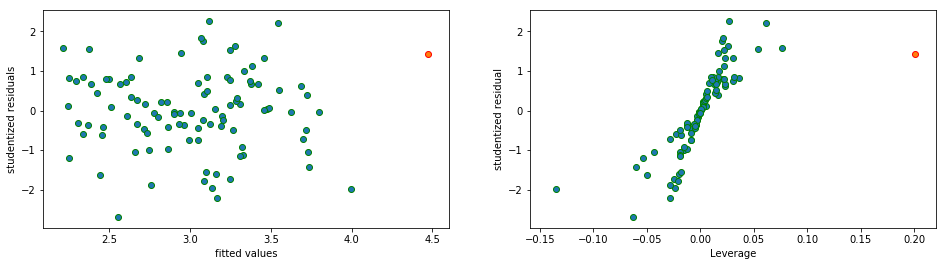

In [33]:
#model 3
fitted_values16 = m16.fittedvalues.values
residuals16 = m16.resid.values
studentized_residuals16 = OLSInfluence(m16).resid_studentized_internal
leverages16 = OLSInfluence(m16).influence

fig, (ax13,ax23) = plt.subplots(1,2,figsize=(16,4))

ax13.scatter(fitted_values16[:-1], studentized_residuals16[:-1],  edgecolors='g');
ax13.scatter(fitted_values16[-1], studentized_residuals16[-1],  edgecolors='r');
ax13.set_xlabel('fitted values');
ax13.set_ylabel('studentized residuals');

ax23.scatter(leverages16[:-1], studentized_residuals16[:-1],  edgecolors='g');
ax23.scatter(leverages16[-1], studentized_residuals16[-1],  edgecolors='r');
ax23.set_xlabel('Leverage');
ax23.set_ylabel('studentized residual');

This observation(c1=0.1,c2=0.8,d=6) is outlier in all three models.